# High Frequency Trading Data For JNJ Stock in October, 2010

In [2]:
import pandas as pd
import numpy as np

jnj = pd.read_csv('TAQ_JNJ_1004_1015_2010_trading_.csv', header = None)

In [4]:
#Date = 5-12
#Hour = 17-18
#Minute = 20-21
#Second = 23-24
#Price = 29-35
#Volume = 41-46

trade_data = {'Date': [], 'Hour': [], 'Minute': [], 
              'Second': [], 'Price': [], 'Volume': []}

for row in range(1,len(jnj)):
#     print("Percent Complete: " + str(row/len(jnj))
    string = str(jnj.iloc[row])
    end = string.index('N')
    trade_data['Date'].append(int(string[5:13]))
    trade_data['Hour'].append(int(string[17:19]))
    trade_data['Minute'].append(int(string[20:22]))
    trade_data['Second'].append(int(string[23:25]))
    trade_data['Price'].append(float(string[29:36]))
    trade_data['Volume'].append(int(string[40:end]))

In [5]:
jnj_df = pd.DataFrame(trade_data)

print("Description of JNJ Trading Data")
print(jnj_df.describe())

               Date           Hour         Minute         Second  \
count  4.195650e+05  419565.000000  419565.000000  419565.000000   
mean   2.010101e+07      12.214987      32.006225      28.922560   
std    3.884847e+00       2.146963      17.557812      17.562212   
min    2.010100e+07       5.000000       0.000000       0.000000   
25%    2.010101e+07      10.000000      17.000000      13.000000   
50%    2.010101e+07      12.000000      34.000000      29.000000   
75%    2.010101e+07      14.000000      47.000000      44.000000   
max    2.010102e+07      19.000000      59.000000      59.000000   

               Price        Volume  
count  419565.000000  4.195650e+05  
mean       63.051936  2.328804e+02  
std         0.588866  3.996851e+03  
min        61.300000  5.000000e+01  
25%        62.860000  1.000000e+02  
50%        63.195000  1.000000e+02  
75%        63.470000  2.000000e+02  
max        64.000000  1.601218e+06  


In [6]:
#Delete Original dataframe to preserve memory
del(jnj)

In [17]:
#Trim All transactions not in the normal trading window: 9:30am - 4pm EST 
#and save to CSV

#Remove values before 9AM and after 4PM
jnj_df_open = jnj_df[(jnj_df['Hour'] >= 9) & (jnj_df['Hour'] < 16)]

#Remove values before 9:30 AM
selRows = jnj_df_open[(jnj_df_open['Hour'] == 9) & (jnj_df_open['Minute'] < 30)].index
jnj_df_open = jnj_df_open.drop(selRows, axis=0)

#Save as csv
jnj_df_open.to_csv('TAQ_JNJ_1004_1015_2010_trading_normal_hours.csv')

print(jnj_df_open.describe())

               Date           Hour         Minute         Second  \
count  4.188310e+05  418831.000000  418831.000000  418831.000000   
mean   2.010101e+07      12.214516      32.027157      28.928718   
std    3.884876e+00       2.142724      17.554689      17.560089   
min    2.010100e+07       9.000000       0.000000       0.000000   
25%    2.010101e+07      10.000000      17.000000      14.000000   
50%    2.010101e+07      12.000000      34.000000      29.000000   
75%    2.010101e+07      14.000000      47.000000      44.000000   
max    2.010102e+07      15.000000      59.000000      59.000000   

               Price        Volume  
count  418831.000000  4.188310e+05  
mean       63.051810  2.129001e+02  
std         0.588851  2.735795e+03  
min        61.300000  5.000000e+01  
25%        62.860000  1.000000e+02  
50%        63.195000  1.000000e+02  
75%        63.470000  2.000000e+02  
max        64.000000  1.601218e+06  


In [18]:
#Delete all data to preserve memory
del(jnj_df)

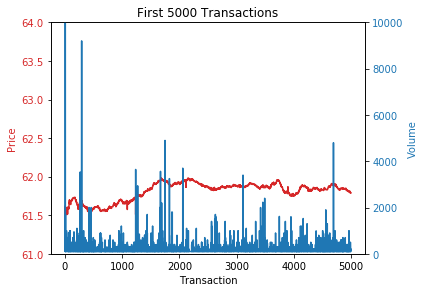

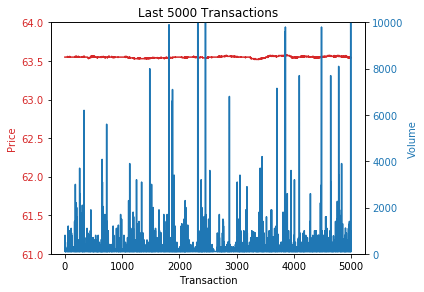

In [35]:
#Visualize the first and last 5000 transactions from file
import matplotlib.pyplot as plt

first5000 = jnj_df_open.iloc[:5000,:]
last5000 = jnj_df_open.iloc[-5000:,:]

def plottransactions(df, title):
    t = np.arange(5000)
    price = np.array(df['Price'])
    volume = np.array(df['Volume'])

    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Transaction')
    ax1.set_ylabel('Price', color=color)
    ax1.plot(t, price, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_ylim(61,64)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
    ax2.plot(t, volume, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylim(0,10000)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    
    plt.title(title)
    plt.show()
    
plottransactions(first5000, "First 5000 Transactions")
plottransactions(last5000, "Last 5000 Transactions")



Number of Transactions with a price change:
114776
Percentage of Transactions: 
27.4%



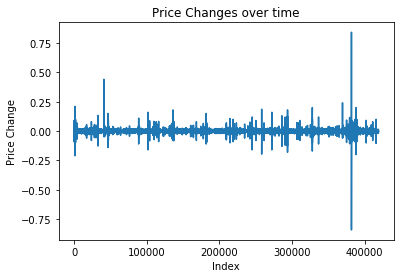

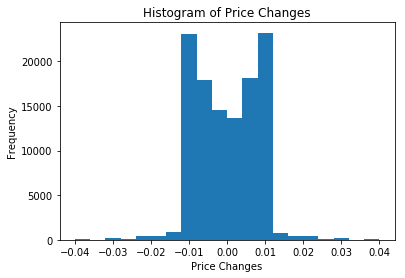

In [59]:
#Transaction Change Analysis

prices = jnj_df_open['Price'].values.tolist()
price_change = []


for i in range(len(prices)):
    if i == 0:
        pass
    else:
        price_change.append(prices[i] - prices[i-1])

print("Number of Transactions with a price change:")
count = 0
price_changes_not0 = []
for i in price_change:
    if i != 0:
        count += 1
        price_changes_not0.append(i)
print(count)
print("Percentage of Transactions: ")
print(str(round(count/len(price_change)*100,2))+"%")
print()

plt.plot(price_change)
plt.xlabel("Index")
plt.ylabel("Price Change")
plt.title("Price Changes over time")
plt.show()

plt.hist(price_changes_not0, bins=20, range=[-.04,.04])
plt.xlabel("Price Changes")
plt.ylabel("Frequency")
plt.title("Histogram of Price Changes")
plt.show()


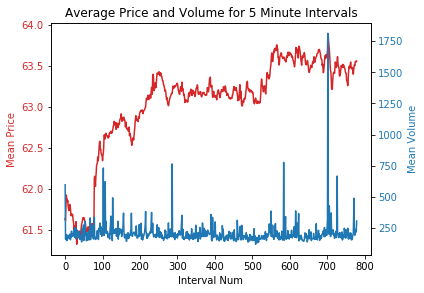

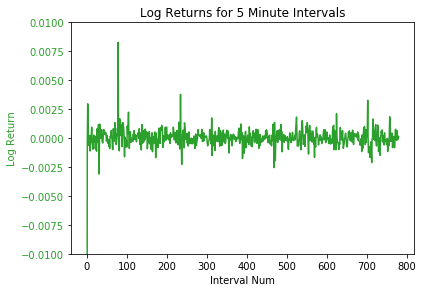

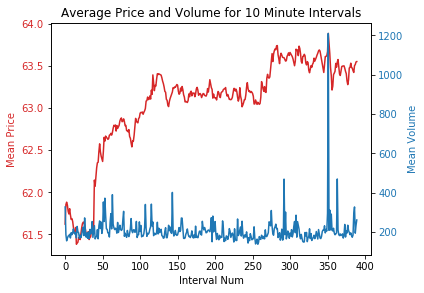

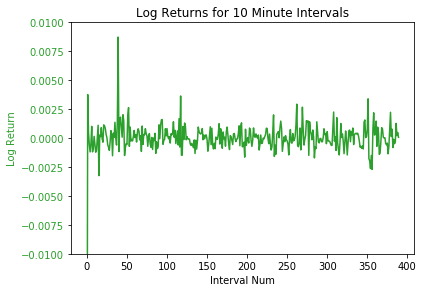

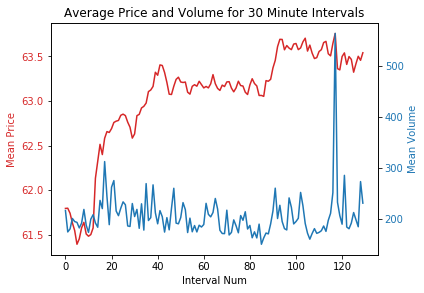

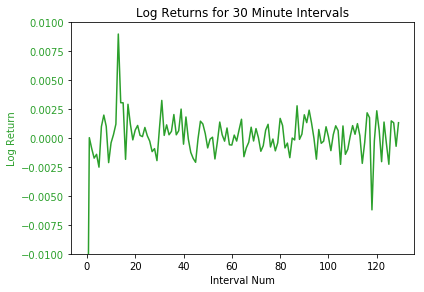

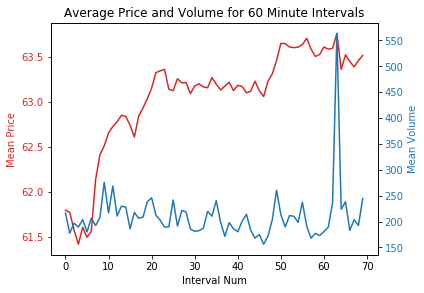

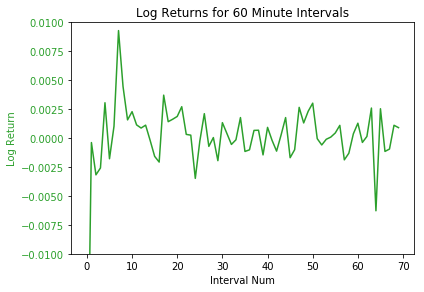

In [87]:
#Calculate Log Returns in time sequences
# u = ln(si / si-1)
import math

def getintervals(minute, data):
                
    mod_fun = []
    
    for row in range(len(data)):
        
        mod_fun.append(data.iloc[row,2] % minute)
    
    interval_num = []
    n = 0

    for i in range(len(mod_fun)):
        if mod_fun[i] < mod_fun[i-1]:
            n += 1
        interval_num.append(n)
        
    data['Time Interval'] = interval_num
    
    meanprice = list(data.groupby(['Time Interval'])['Price'].mean())
    meanvol = list(data.groupby(['Time Interval'])['Volume'].mean())
    
    uval = []
    for i in range(len(meanprice)):
        uval.append(math.log(meanprice[i] / meanprice[i-1])) 
    
    intervaldata = {'Mean Price': meanprice, 'Mean Vol': meanvol, 'Log Return': uval}
    
    intervaldf = pd.DataFrame(intervaldata)
    
    return intervaldf
        
def plotpricevol(df, title):
    t = np.arange(len(df))
    price = np.array(df['Mean Price'])
    volume = np.array(df['Mean Vol'])

    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Interval Num')
    ax1.set_ylabel('Mean Price', color=color)
    ax1.plot(t, price, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
#     ax1.set_ylim(61,64)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('Mean Volume', color=color)  # we already handled the x-label with ax1
    ax2.plot(t, volume, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
#     ax2.set_ylim(0,10000)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    
    plt.title(title)
    plt.show()

def plotlogreturns(df, title):
    t = np.arange(len(df))
    logret = np.array(df['Log Return'])

    fig, ax1 = plt.subplots()

    color = 'tab:green'
    ax1.set_xlabel('Interval Num')
    ax1.set_ylabel('Log Return', color=color)
    ax1.plot(t, logret, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_ylim(-.010,.010)


    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    
    plt.title(title)
    plt.show()

#Plots and Save CSV
int5 = (getintervals(5, jnj_df_open))
plotpricevol(int5, "Average Price and Volume for 5 Minute Intervals")
plotlogreturns(int5, "Log Returns for 5 Minute Intervals")
int5.to_csv('TAQ_JNJ_1004_1015_2010_5_min_trading_unit.csv')

int10 = (getintervals(10, jnj_df_open))
plotpricevol(int10, "Average Price and Volume for 10 Minute Intervals")
plotlogreturns(int10, "Log Returns for 10 Minute Intervals")
int10.to_csv('TAQ_JNJ_1004_1015_2010_10_min_trading_unit.csv')

int30 = (getintervals(30, jnj_df_open))
plotpricevol(int30, "Average Price and Volume for 30 Minute Intervals")
plotlogreturns(int30, "Log Returns for 30 Minute Intervals")
int30.to_csv('TAQ_JNJ_1004_1015_2010_30_min_trading_unit.csv')

int60 = (getintervals(60, jnj_df_open))
plotpricevol(int60, "Average Price and Volume for 60 Minute Intervals")
plotlogreturns(int60, "Log Returns for 60 Minute Intervals")
int60.to_csv('TAQ_JNJ_1004_1015_2010_60_min_trading_unit.csv')



In [95]:
#Compute Section Volatility and compare with realized volatiltiy

n = len(int60)

sum_logret = 0
sumsq_logret = 0
for i in range(n):
    sum_logret += (int60.iloc[i,2])
    sumsq_logret += (int60.iloc[i,2])**2

s = math.sqrt(((1 / (n-1)) * sumsq_logret) - 
              (((1 / (n*(n-1))) * sum_logret) ** 2))

print("Section Volatility is: ")
print(round(s,8))

#Realized Volatility is the sum of all the squares of log returns in all partitioned intervals

r = 0

for i in range(n):
    r += (int60.iloc[i,2])**2

print("\nRealized Volatility is: ")
print(round(r,8))

if (r > s):
    print("\nRealized Volatility is higher than Section Volatiltiy!")

else:
    print("\nSection Volatility is higher than Realized Volatiltiy!")
    

Section Volatility is: 
0.00393085

Realized Volatility is: 
0.00106616

Section Volatility is higher than Realized Volatiltiy!


In [104]:
#Compute section skewness and kurtosis
import statistics as stats

meanu = stats.mean(int60['Log Return'])
stdu = stats.stdev(int60['Log Return'])
skewsum3 = 0
skewsum4 = 0

for i in range(n):
    skewsum3 += ((int60.iloc[i,2]) - meanu)**3
    skewsum4 += ((int60.iloc[i,2]) - meanu)**4

skew = ((n / ((n-1) * (n-2))) * (skewsum3 / stdu**3))
print("Skewness of Log Returns is: ")
print(round(skew,8))

kurt = (((1 / n) * (skewsum4 / stdu**4)) - 3)
print("\nKurtosis of Log Returns is: ")
print(round(kurt,8))

Skewness of Log Returns is: 
-4.87817941

Kurtosis of Log Returns is: 
31.45939088


# High Frequency Trading Data For CAT Stock in February, 2010

In [109]:
import pandas as pd
import numpy as np

cat = pd.read_csv('TAQ_CAT_FEB_2010_trading_.csv', header = None)

In [110]:
#Date = 5-12
#Hour = 17-18
#Minute = 20-21
#Second = 23-24
#Price = 29-35
#Volume = 41-46

trade_data = {'Date': [], 'Hour': [], 'Minute': [], 
              'Second': [], 'Price': [], 'Volume': []}

for row in range(1,len(cat)):
    string = str(cat.iloc[row])
    end = string.index('N')
    trade_data['Date'].append(int(string[5:13]))
    trade_data['Hour'].append(int(string[17:19]))
    trade_data['Minute'].append(int(string[20:22]))
    trade_data['Second'].append(int(string[23:25]))
    trade_data['Price'].append(float(string[29:36]))
    trade_data['Volume'].append(int(string[40:end]))

In [111]:
cat_df = pd.DataFrame(trade_data)

print("Description of CAT Trading Data")
print(cat_df.describe())

Description of CAT Trading Data
               Date           Hour         Minute         Second  \
count  9.191230e+05  919123.000000  919123.000000  919123.000000   
mean   2.010021e+07      11.915823      31.924854      29.007522   
std    7.692496e+00       2.145321      17.195014      17.392824   
min    2.010020e+07       4.000000       0.000000       0.000000   
25%    2.010020e+07      10.000000      17.000000      14.000000   
50%    2.010021e+07      12.000000      34.000000      29.000000   
75%    2.010022e+07      14.000000      47.000000      44.000000   
max    2.010023e+07      19.000000      59.000000      59.000000   

               Price         Volume  
count  919123.000000  919123.000000  
mean       54.742191     198.265070  
std         2.331900    2093.084353  
min        50.500000       1.000000  
25%        52.960000     100.000000  
50%        54.720000     100.000000  
75%        56.860000     200.000000  
max        58.970000  950000.000000  


In [112]:
#Delete Original dataframe to preserve memory
del(cat)

In [113]:
#Trim All transactions not in the normal trading window: 9:30am - 4pm EST 
#and save to CSV

#Remove values before 9AM and after 4PM
cat_df_open = cat_df[(cat_df['Hour'] >= 9) & (cat_df['Hour'] < 16)]

#Remove values before 9:30 AM
selRows = cat_df_open[(cat_df_open['Hour'] == 9) & (cat_df_open['Minute'] < 30)].index
cat_df_open = cat_df_open.drop(selRows, axis=0)

#Save as csv
cat_df_open.to_csv('TAQ_CAT_1004_1015_2010_trading_normal_hours.csv')

print(cat_df_open.describe())

               Date           Hour         Minute         Second  \
count  9.162150e+05  916215.000000  916215.000000  916215.000000   
mean   2.010021e+07      11.918078      31.953664      29.010929   
std    7.692569e+00       2.135634      17.188801      17.389141   
min    2.010020e+07       9.000000       0.000000       0.000000   
25%    2.010020e+07      10.000000      17.000000      14.000000   
50%    2.010021e+07      12.000000      34.000000      29.000000   
75%    2.010022e+07      14.000000      47.000000      44.000000   
max    2.010023e+07      15.000000      59.000000      59.000000   

               Price         Volume  
count  916215.000000  916215.000000  
mean       54.740804     191.436909  
std         2.332036    1683.774393  
min        50.500000       1.000000  
25%        52.960000     100.000000  
50%        54.710000     100.000000  
75%        56.860000     200.000000  
max        58.970000  950000.000000  


In [114]:
#Delete all data to preserve memory
del(cat_df)

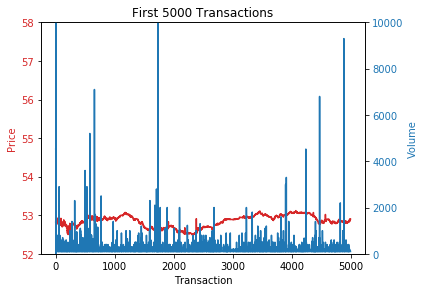

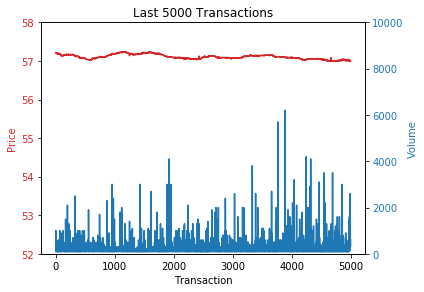

In [121]:
#Visualize the first and last 5000 transactions from file
import matplotlib.pyplot as plt

first5000 = cat_df_open.iloc[:5000,:]
last5000 = cat_df_open.iloc[-5000:,:]

def plottransactions(df, title):
    t = np.arange(5000)
    price = np.array(df['Price'])
    volume = np.array(df['Volume'])

    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Transaction')
    ax1.set_ylabel('Price', color=color)
    ax1.plot(t, price, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_ylim(52,58)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
    ax2.plot(t, volume, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylim(0,10000)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    
    plt.title(title)
    plt.show()
    
plottransactions(first5000, "First 5000 Transactions")
plottransactions(last5000, "Last 5000 Transactions")



Number of Transactions with a price change:
317994
Percentage of Transactions: 
34.71%



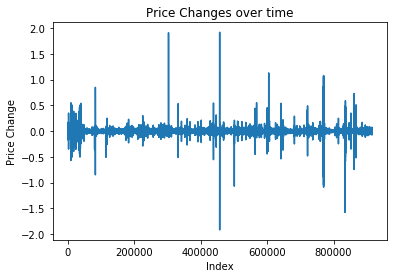

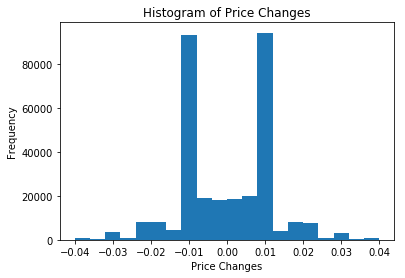

In [116]:
#Transaction Change Analysis

prices = cat_df_open['Price'].values.tolist()
price_change = []


for i in range(len(prices)):
    if i == 0:
        pass
    else:
        price_change.append(prices[i] - prices[i-1])

print("Number of Transactions with a price change:")
count = 0
price_changes_not0 = []
for i in price_change:
    if i != 0:
        count += 1
        price_changes_not0.append(i)
print(count)
print("Percentage of Transactions: ")
print(str(round(count/len(price_change)*100,2))+"%")
print()

plt.plot(price_change)
plt.xlabel("Index")
plt.ylabel("Price Change")
plt.title("Price Changes over time")
plt.show()

plt.hist(price_changes_not0, bins=20, range=[-.04,.04])
plt.xlabel("Price Changes")
plt.ylabel("Frequency")
plt.title("Histogram of Price Changes")
plt.show()


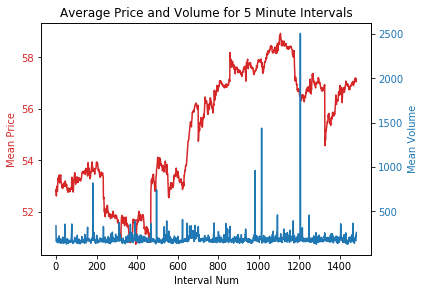

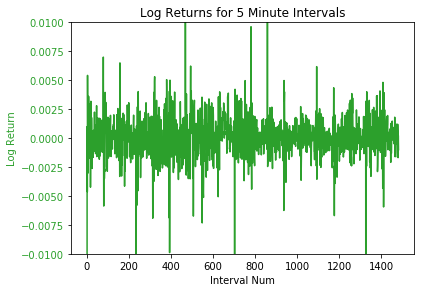

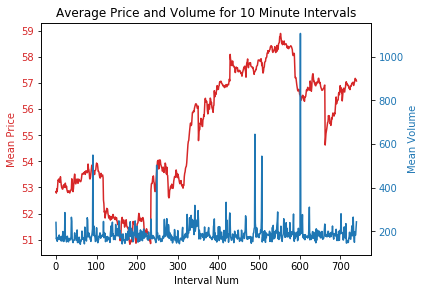

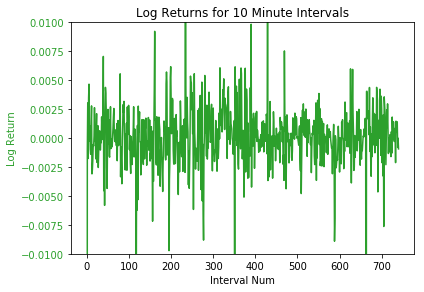

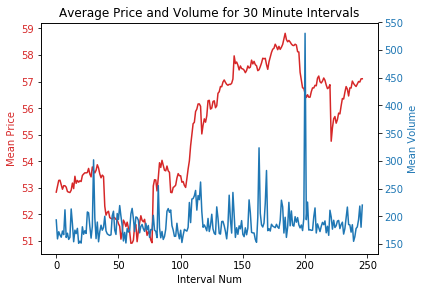

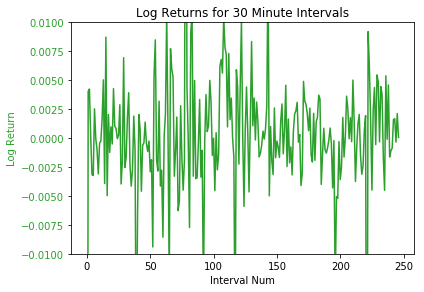

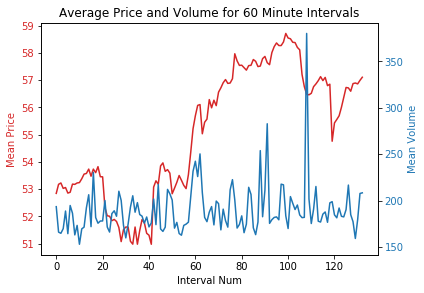

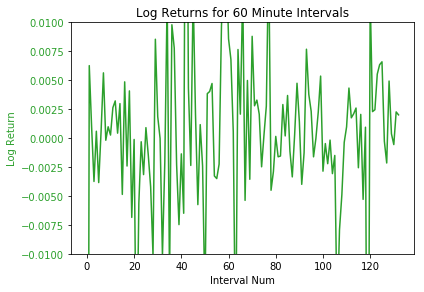

In [117]:
#Calculate Log Returns in time sequences
# u = ln(si / si-1)
import math

def getintervals(minute, data):
                
    mod_fun = []
    
    for row in range(len(data)):
        
        mod_fun.append(data.iloc[row,2] % minute)
    
    interval_num = []
    n = 0

    for i in range(len(mod_fun)):
        if mod_fun[i] < mod_fun[i-1]:
            n += 1
        interval_num.append(n)
        
    data['Time Interval'] = interval_num
    
    meanprice = list(data.groupby(['Time Interval'])['Price'].mean())
    meanvol = list(data.groupby(['Time Interval'])['Volume'].mean())
    
    uval = []
    for i in range(len(meanprice)):
        uval.append(math.log(meanprice[i] / meanprice[i-1])) 
    
    intervaldata = {'Mean Price': meanprice, 'Mean Vol': meanvol, 'Log Return': uval}
    
    intervaldf = pd.DataFrame(intervaldata)
    
    return intervaldf
        
def plotpricevol(df, title):
    t = np.arange(len(df))
    price = np.array(df['Mean Price'])
    volume = np.array(df['Mean Vol'])

    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Interval Num')
    ax1.set_ylabel('Mean Price', color=color)
    ax1.plot(t, price, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
#     ax1.set_ylim(61,64)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('Mean Volume', color=color)  # we already handled the x-label with ax1
    ax2.plot(t, volume, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
#     ax2.set_ylim(0,10000)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    
    plt.title(title)
    plt.show()

def plotlogreturns(df, title):
    t = np.arange(len(df))
    logret = np.array(df['Log Return'])

    fig, ax1 = plt.subplots()

    color = 'tab:green'
    ax1.set_xlabel('Interval Num')
    ax1.set_ylabel('Log Return', color=color)
    ax1.plot(t, logret, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_ylim(-.010,.010)


    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    
    plt.title(title)
    plt.show()

#Plots and Save CSV
int5 = (getintervals(5, cat_df_open))
plotpricevol(int5, "Average Price and Volume for 5 Minute Intervals")
plotlogreturns(int5, "Log Returns for 5 Minute Intervals")
int5.to_csv('TAQ_CAT_1004_1015_2010_5_min_trading_unit.csv')

int10 = (getintervals(10, cat_df_open))
plotpricevol(int10, "Average Price and Volume for 10 Minute Intervals")
plotlogreturns(int10, "Log Returns for 10 Minute Intervals")
int10.to_csv('TAQ_CAT_1004_1015_2010_10_min_trading_unit.csv')

int30 = (getintervals(30, cat_df_open))
plotpricevol(int30, "Average Price and Volume for 30 Minute Intervals")
plotlogreturns(int30, "Log Returns for 30 Minute Intervals")
int30.to_csv('TAQ_CAT_1004_1015_2010_30_min_trading_unit.csv')

int60 = (getintervals(60, cat_df_open))
plotpricevol(int60, "Average Price and Volume for 60 Minute Intervals")
plotlogreturns(int60, "Log Returns for 60 Minute Intervals")
int60.to_csv('TAQ_CAT_1004_1015_2010_60_min_trading_unit.csv')



In [118]:
#Compute Section Volatility and compare with realized volatiltiy

n = len(int60)

sum_logret = 0
sumsq_logret = 0
for i in range(n):
    sum_logret += (int60.iloc[i,2])
    sumsq_logret += (int60.iloc[i,2])**2

s = math.sqrt(((1 / (n-1)) * sumsq_logret) - 
              (((1 / (n*(n-1))) * sum_logret) ** 2))

print("Section Volatility is: ")
print(round(s,8))

#Realized Volatility is the sum of all the squares of log returns in all partitioned intervals

r = 0

for i in range(n):
    r += (int60.iloc[i,2])**2

print("\nRealized Volatility is: ")
print(round(r,8))

if (r > s):
    print("\nRealized Volatility is higher than Section Volatiltiy!")

else:
    print("\nSection Volatility is higher than Realized Volatiltiy!")
    

Section Volatility is: 
0.01025263

Realized Volatility is: 
0.01387535

Realized Volatility is higher than Section Volatiltiy!


In [119]:
#Compute section skewness and kurtosis
import statistics as stats

meanu = stats.mean(int60['Log Return'])
stdu = stats.stdev(int60['Log Return'])
skewsum3 = 0
skewsum4 = 0

for i in range(n):
    skewsum3 += ((int60.iloc[i,2]) - meanu)**3
    skewsum4 += ((int60.iloc[i,2]) - meanu)**4

skew = ((n / ((n-1) * (n-2))) * (skewsum3 / stdu**3))
print("Skewness of Log Returns is: ")
print(round(skew,8))

kurt = (((1 / n) * (skewsum4 / stdu**4)) - 3)
print("\nKurtosis of Log Returns is: ")
print(round(kurt,8))

Skewness of Log Returns is: 
-3.26565312

Kurtosis of Log Returns is: 
25.36869652


# Bid-Ask Spread and Other Measures for HFT

In [3]:
cat2 = pd.read_csv('TAQ_CAT_QUOTE_0104_2010.csv', header = None)

pd.set_option('display.max_colwidth',1000)
    
#Date = 5-12
#Hour = 17-18
#Minute = 20-21
#Second = 23-24
#Bid = 29-33
#Ofr = 38-42
#Bissiz = 49-50
#Ofrsize = 59-60

option_data = {'Date': [], 'Hour': [], 'Minute': [], 
              'Second': [], 'Bid': [], 'Ofr': [],
              'BidSiz': [], 'OfrSiz': []}
i=0
for row in range(1,len(cat2)):
    string = str(cat2.iloc[row])
    end = string.index('N')
    option_data['Date'].append(int(string[5:13]))
    option_data['Hour'].append(int(string[17:19]))
    option_data['Minute'].append(int(string[20:22]))
    option_data['Second'].append(int(string[23:25]))
    option_data['Bid'].append(float(string[27:34]))
    option_data['Ofr'].append(float(string[36:43]))
    option_data['BidSiz'].append(int(string[45:53]))
    option_data['OfrSiz'].append(int(string[59:end]))
    i+=1
    

In [174]:
cat_df2 = pd.DataFrame(option_data)

print("Description of CAT Option Data")
print(cat_df2.describe())

Description of CAT Option Data
             Date           Hour         Minute         Second            Bid  \
count    394903.0  394903.000000  394903.000000  394903.000000  394903.000000   
mean   20100104.0      12.055616      28.688744      27.304257      58.528775   
std           0.0       2.129376      18.997553      17.998103       2.189356   
min    20100104.0       4.000000       0.000000       0.000000       0.000000   
25%    20100104.0      10.000000      10.000000      10.000000      58.460000   
50%    20100104.0      12.000000      29.000000      27.000000      58.680000   
75%    20100104.0      14.000000      46.000000      43.000000      58.840000   
max    20100104.0      20.000000      59.000000      59.000000      59.180000   

                 Ofr         BidSiz         OfrSiz  
count  394903.000000  394903.000000  394903.000000  
mean       58.547232       6.794051       6.441073  
std         3.961943      16.682678      10.273039  
min         0.000000       

In [175]:
#Delete Original dataframe to preserve memory
del(cat2)

Bid Ask Spread Stats: 
  Mean: 0.018457368011891597
  St Dev: 4.06243872499586


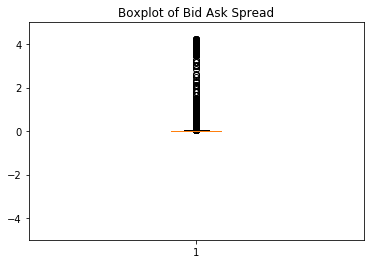

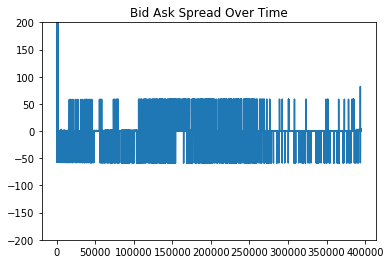

In [187]:
#Compute and viz bid-ask spread

bidaskspread = []

for a,b in zip(cat_df2['Ofr'], cat_df2['Bid']):
    bidaskspread.append(a-b)

print("Bid Ask Spread Stats: ")
print("  Mean: " + str(stats.mean(bidaskspread)))
print("  St Dev: " + str(stats.stdev(bidaskspread)))
plt.boxplot(bidaskspread)
plt.ylim(-5,5)
plt.title("Boxplot of Bid Ask Spread")
plt.show()

plt.plot(bidaskspread)
plt.title("Bid Ask Spread Over Time")
plt.ylim(-200,200)
plt.show()

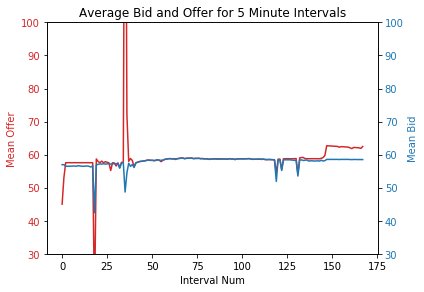

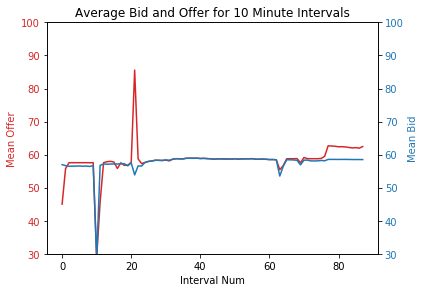

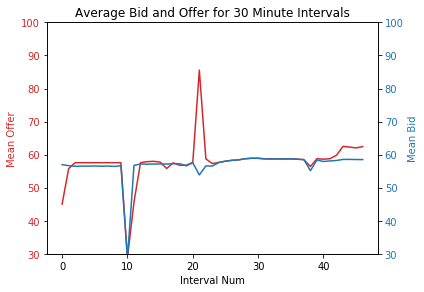

In [198]:
#Partition into sequences of intervals

def getintervals(minute, data):
                
    mod_fun = []
    
    for row in range(len(data)):
        
        mod_fun.append(data.iloc[row,2] % minute)
    
    interval_num = []
    n = 0

    for i in range(len(mod_fun)):
        if mod_fun[i] < mod_fun[i-1]:
            n += 1
        interval_num.append(n)
        
    data['Time Interval'] = interval_num
    
    meanofr = list(data.groupby(['Time Interval'])['Ofr'].mean())
    meanbid = list(data.groupby(['Time Interval'])['Bid'].mean())
    meanofrsize = list(data.groupby(['Time Interval'])['OfrSiz'].mean())
    meanbidsize = list(data.groupby(['Time Interval'])['BidSiz'].mean())
        
    intervaldata = {'Mean Bid': meanbid, 'Mean Ofr': meanofr, 
                   'Mean Bid Size': meanbidsize, 'Mean Ofr Size': meanofrsize}
    
    intervaldf = pd.DataFrame(intervaldata)
    
    return intervaldf
        
def plotpricevol(df, title):
    t = np.arange(len(df))
    ofr = np.array(df['Mean Ofr'])
    bid = np.array(df['Mean Bid'])

    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Interval Num')
    ax1.set_ylabel('Mean Offer', color=color)
    ax1.plot(t, ofr, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_ylim(30,100)


    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('Mean Bid', color=color)  # we already handled the x-label with ax1
    ax2.plot(t, bid, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylim(30,100)


    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    
    plt.title(title)
    plt.show()

#Plots and Save CSV
int5 = (getintervals(5, cat_df2))
plotpricevol(int5, "Average Bid and Offer for 5 Minute Intervals")
int5.to_csv('TAQ_CAT_QUOTE_0104_2010_5_min_trading_unit.csv')

int10 = (getintervals(10, cat_df2))
plotpricevol(int10, "Average Bid and Offer for 10 Minute Intervals")
int10.to_csv('TAQ_CAT_QUOTE_0104_2010_10_min_trading_unit.csv')

int30 = (getintervals(30, cat_df2))
plotpricevol(int30, "Average Bid and Offer for 30 Minute Intervals")
int30.to_csv('TAQ_CAT_QUOTE_0104_2010_30_min_trading_unit.csv')


Entropy Values for Offer and Bid Volume

H-offer is: -8959303.2551861

H-bid is: -10060833.88640934

Relative Entropy is: 0.42102289


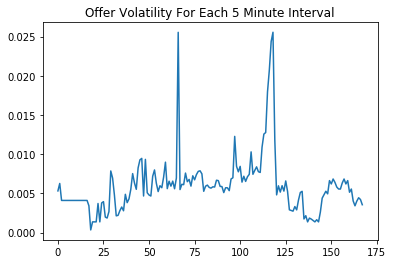

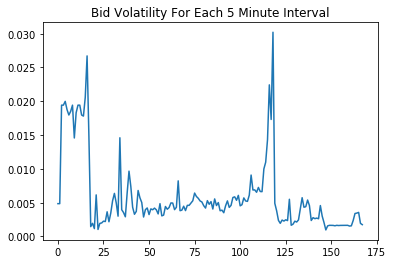

In [210]:
#Compute entropy values and visualize it

Hoffer = 0
Hbid = 0

for o,b in zip(cat_df2['OfrSiz'],cat_df2['BidSiz']):
    if o == 0:
        Hoffer += 0
    elif b == 0:
        Hbid += 0
    else:
        Hoffer += (o * math.log2(o))
        Hbid += (b * math.log2(b))

print("Entropy Values for Offer and Bid Volume")
print("\nH-offer is: " + str(round(Hoffer * -1,8)))
print("\nH-bid is: " + str(round(Hbid * -1,8)))

vi_ofr_sum = np.sum(int5['Mean Ofr Size'])
pi = []

for i in int5['Mean Ofr Size']:
    pi.append(i / vi_ofr_sum)

vi_bid_sum = np.sum(int5['Mean Bid Size'])
qi = []

for i in int5['Mean Bid Size']:
    qi.append(i / vi_bid_sum)

#Relative Entropy for offer and bid volume
relent = 0
for p,q in zip(pi,qi):
    relent += p * math.log2(p/q)

print("\nRelative Entropy is: " + str(round(relent,8)))

plt.plot(pi)
plt.title("Offer Volatility For Each 5 Minute Interval")
plt.show()

plt.plot(qi)
plt.title("Bid Volatility For Each 5 Minute Interval")
plt.show()
